# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


Learning rate controls how fast and how stably the algorithm converges to a minimum. If learning rate is too low progress is very slow and training takes many iterations. If the learning rate is too high the updated data might overshoot the minimum and output of each step might oscillate or even diverge.
1. We can use a constant learning rate and fine tune it to find best one manually.
2. We can use Step decay by reducing learning rate by 0.1 (or any other factor) after each epoch.
3. We can use Exponential decay where learning rate reduces exponentially depending on the number of epoches done.
4. We can use momentum based learning rate where current learning rate depends on how much it dropped lat time.



#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [1]:
import pandas as pd
#1. Read it using pandas.
try:
    df = pd.read_csv('Real estate.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Real estate.csv' not found. Please upload the file or adjust the loading method.")
    df = None


import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    # Remove the 'No' column as it's an identifier and not a feature
    df = df.drop('No', axis=1)

    # Separate features (X) and target (y)
    X = df.drop('Y house price of unit area', axis=1)
    y = df['Y house price of unit area']

from sklearn.model_selection import train_test_split
# 5. Split the dataset into train and test data. Test data size = 25% of total dataset.
if df is not None:
    # Split the dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler
# 6. Normalize the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
if df is not None:
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("\nFeatures (X_train and X_test) normalized successfully using MinMaxScaler.")
    print(f"X_train_scaled shape: {X_train_scaled.shape}")
    print(f"X_test_scaled shape: {X_test_scaled.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

Dataset loaded successfully.

Features (X_train and X_test) normalized successfully using MinMaxScaler.
X_train_scaled shape: (310, 6)
X_test_scaled shape: (104, 6)
y_train shape: (310,)
y_test shape: (104,)


In [2]:
import numpy as np

class BatchGradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def _initialize_weights(self, n_features):
        # Initialize weights to zeros and bias to zero
        self.weights = np.zeros(n_features)
        self.bias = 0

    def _predict(self, X):
        # Hypothesis: X * weights + bias
        return np.dot(X, self.weights) + self.bias

    def _calculate_cost(self, y_true, y_pred):
        # Mean Squared Error (MSE) cost function
        m = len(y_true)
        cost = (1 / (2 * m)) * np.sum((y_pred - y_true)**2)
        return cost

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._initialize_weights(n_features)

        for iteration in range(self.n_iterations):
            y_pred = self._predict(X)

            # Calculate gradients
            # For weights: (1/m) * sum((y_pred - y_true) * X)
            # For bias: (1/m) * sum(y_pred - y_true)
            gradients = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            bias_gradient = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * gradients
            self.bias -= self.learning_rate * bias_gradient

            # Store cost for analysis
            cost = self._calculate_cost(y, y_pred)
            self.cost_history.append(cost)

            if (iteration + 1) % 100 == 0:
                print(f"Iteration {iteration + 1}/{self.n_iterations}, Cost: {cost:.4f}")

        print("Training complete for Batch Gradient Descent.")

    def predict(self, X):
        return self._predict(X)

# Example usage (will be called in a later step):
# bgd_model = BatchGradientDescentLinearRegression(learning_rate=0.01, n_iterations=1000)
# bgd_model.fit(X_train_scaled, y_train)
# y_pred_bgd = bgd_model.predict(X_test_scaled)

In [23]:
bgd_model = BatchGradientDescentLinearRegression(learning_rate=0.02, n_iterations=2000)
bgd_model.fit(X_train_scaled, y_train)
y_pred_gd = bgd_model.predict(X_test_scaled)
print("Batch Gradient Descent model trained and predictions made.")

Iteration 100/2000, Cost: 66.1258
Iteration 200/2000, Cost: 58.8473
Iteration 300/2000, Cost: 54.0782
Iteration 400/2000, Cost: 50.8836
Iteration 500/2000, Cost: 48.7121
Iteration 600/2000, Cost: 47.2111
Iteration 700/2000, Cost: 46.1539
Iteration 800/2000, Cost: 45.3937
Iteration 900/2000, Cost: 44.8348
Iteration 1000/2000, Cost: 44.4142
Iteration 1100/2000, Cost: 44.0900
Iteration 1200/2000, Cost: 43.8341
Iteration 1300/2000, Cost: 43.6272
Iteration 1400/2000, Cost: 43.4563
Iteration 1500/2000, Cost: 43.3121
Iteration 1600/2000, Cost: 43.1883
Iteration 1700/2000, Cost: 43.0801
Iteration 1800/2000, Cost: 42.9842
Iteration 1900/2000, Cost: 42.8982
Iteration 2000/2000, Cost: 42.8201
Training complete for Batch Gradient Descent.
Batch Gradient Descent model trained and predictions made.


In [25]:
import numpy as np

class StochasticGradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def _initialize_weights(self, n_features):
        # Initialize weights to zeros and bias to zero
        self.weights = np.zeros(n_features)
        self.bias = 0

    def _predict(self, X):
        # Hypothesis: X * weights + bias
        return np.dot(X, self.weights) + self.bias

    def _calculate_cost(self, y_true, y_pred):
        # Mean Squared Error (MSE) cost function
        m = len(y_true)
        cost = (1 / (2 * m)) * np.sum((y_pred - y_true)**2)
        return cost

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._initialize_weights(n_features)

        for iteration in range(self.n_iterations):
            # Shuffle the training data for each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)

            epoch_cost = 0
            for i in indices:
                xi = X[i:i+1] # Get a single sample, maintain 2D shape
                yi = y.iloc[i:i+1] # Get a single sample, maintain Series shape

                y_pred_single = self._predict(xi)

                # Calculate gradients for a single sample
                error = y_pred_single - yi.values[0]

                gradient_weights = error * xi[0]
                gradient_bias = error

                # Update weights and bias
                self.weights -= self.learning_rate * gradient_weights
                self.bias -= self.learning_rate * gradient_bias

            # Calculate and store cost after each epoch using the entire dataset
            y_pred_full = self._predict(X)
            cost = self._calculate_cost(y, y_pred_full)
            self.cost_history.append(cost)

            if (iteration + 1) % 100 == 0:
                print(f"Epoch {iteration + 1}/{self.n_iterations}, Cost: {cost:.4f}")

        print("Training complete for Stochastic Gradient Descent.")

    def predict(self, X):
        return self._predict(X)

In [27]:
sgd_model = StochasticGradientDescentLinearRegression(learning_rate=0.020, n_iterations=2000)
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_model.predict(X_test_scaled)
print("Stochastic Gradient Descent model trained and predictions made.")

Epoch 100/2000, Cost: 41.7213
Epoch 200/2000, Cost: 40.5109
Epoch 300/2000, Cost: 41.0221
Epoch 400/2000, Cost: 40.5391
Epoch 500/2000, Cost: 40.5930
Epoch 600/2000, Cost: 41.1004
Epoch 700/2000, Cost: 40.6168
Epoch 800/2000, Cost: 41.1722
Epoch 900/2000, Cost: 41.5338
Epoch 1000/2000, Cost: 40.5792
Epoch 1100/2000, Cost: 40.6600
Epoch 1200/2000, Cost: 40.5019
Epoch 1300/2000, Cost: 40.4899
Epoch 1400/2000, Cost: 40.5951
Epoch 1500/2000, Cost: 40.4818
Epoch 1600/2000, Cost: 40.6641
Epoch 1700/2000, Cost: 41.9743
Epoch 1800/2000, Cost: 40.9417
Epoch 1900/2000, Cost: 40.8015
Epoch 2000/2000, Cost: 40.8503
Training complete for Stochastic Gradient Descent.
Stochastic Gradient Descent model trained and predictions made.


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Batch Gradient Descent Model
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

print("Batch Gradient Descent Model Evaluation:")
print(f"  Mean Squared Error (MSE): {mse_gd:.4f}")
print(f"  R\u00b2 Score: {r2_gd:.4f}")

Batch Gradient Descent Model Evaluation:
  Mean Squared Error (MSE): 66.2260
  R² Score: 0.5825


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate Stochastic Gradient Descent Model
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("\nStochastic Gradient Descent Model Evaluation:")
print(f"  Mean Squared Error (MSE): {mse_sgd:.4f}")
print(f"  R\u00b2 Score: {r2_sgd:.4f}")


Stochastic Gradient Descent Model Evaluation:
  Mean Squared Error (MSE): 65.6116
  R² Score: 0.5864


In [28]:
import pandas as pd

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'GD_Predicted': y_pred_gd,
    'SGD_Predicted': y_pred_sgd
})

# Display the first few rows of the comparison DataFrame
print("\nSample of Actual vs. Predicted House Prices:")
print(comparison_df.head(10))



Sample of Actual vs. Predicted House Prices:
     Actual  GD_Predicted  SGD_Predicted
358    45.1     47.323779      47.520873
350    42.3     40.740112      40.719689
373    52.2     39.561974      43.860433
399    37.3     35.510964      39.768358
369    22.8     26.270565      26.997707
72     36.3     46.976204      44.679627
262    53.0     44.629252      43.887202
140    51.4     46.507792      45.710372
93     16.1     22.530198      23.235543
70     59.0     55.465779      53.986249


The **SGD path is erratic** because each update is computed using **only one training sample**, so the gradient is a noisy estimate of the true gradient, causing frequent zig-zag movements instead of a smooth descent like GD, which uses the entire dataset. Despite this noise, **SGD is preferred for very large datasets** because it is **much faster per update, requires less memory**, can start learning immediately, and often reaches a good solution much sooner than GD, making it more practical and scalable.


# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



a) A Decision Tree is a supervised learning algorithm because it is trained on labeled data, where each input example has a known output. The tree learns decision rules by repeatedly splitting the data based on feature values to best predict the target variable, making it suitable for both classification and regression tasks.

b) Entropy in decision trees is a measure of impurity or uncertainty in a dataset. It quantifies how mixed the class labels are at a node, with lower entropy meaning the data is more pure. Decision trees use entropy to decide the best feature to split the data, aiming to reduce uncertainty and create more homogeneous subsets.

c) A reduction in entropy when a node is split signifies that the data becomes more pure and less uncertain after the split. This means the chosen feature effectively separates the data into subsets with more uniform class labels, improving the decision tree’s ability to make accurate predictions.


In [36]:
import numpy as np
import pandas as pd

def calculate_entropy(class_labels):
    """
    Calculates the entropy of a given set of class labels.
    """
    if len(class_labels) == 0:
        return 0

    # Count occurrences of each class
    unique_labels, counts = np.unique(class_labels, return_counts=True)
    probabilities = counts / len(class_labels)

    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-9)) # Add small epsilon to avoid log(0)
    return entropy



In [37]:
# Define the dataset
data = {
    'Class': ['-', '+', '+', '+', '+', '+', '-', '-', '-', '-'],
    'x': [-3, 3, 1, 1, -1, -1, 1, 1, -1, -1],
    'y': [0, 3, 1, -1, 1, -1, 5, 3, 5, 3]
}
df = pd.DataFrame(data)

# 1. Compute the entropy of the root node
root_entropy = calculate_entropy(df['Class'])
print(f"1. Entropy of the root node: {root_entropy:.2f}")

# Display the dataset
print("\nDataset:")
print(df)


1. Entropy of the root node: 1.00

Dataset:
  Class  x  y
0     - -3  0
1     +  3  3
2     +  1  1
3     +  1 -1
4     + -1  1
5     + -1 -1
6     -  1  5
7     -  1  3
8     - -1  5
9     - -1  3


In [35]:
def calculate_information_gain(df, feature, threshold, root_entropy):
    """
    Calculates the information gain for a given split.
    """
    # Split data based on the threshold
    left_child_df = df[df[feature] <= threshold]
    right_child_df = df[df[feature] > threshold]

    # Calculate entropy for each child node
    entropy_left = calculate_entropy(left_child_df['Class'])
    entropy_right = calculate_entropy(right_child_df['Class'])

    # Calculate weighted average entropy of children
    weighted_avg_entropy = \
        (len(left_child_df) / len(df)) * entropy_left + \
        (len(right_child_df) / len(df)) * entropy_right

    # Information Gain
    information_gain = root_entropy - weighted_avg_entropy

    return information_gain, entropy_left, entropy_right


# Calculate and store IG for each split
splits_info = []

# Split A: (x <= -2?)
feature_a = 'x'
threshold_a = -2
ig_a, el_a, er_a = calculate_information_gain(df, feature_a, threshold_a, root_entropy)
splits_info.append({
    'Split': f"x <= {threshold_a}",
    'Entropy_Left': el_a,
    'Entropy_Right': er_a,
    'Information_Gain': ig_a
})

# Split B: (x <= 2?)
feature_b = 'x'
threshold_b = 2
ig_b, el_b, er_b = calculate_information_gain(df, feature_b, threshold_b, root_entropy)
splits_info.append({
    'Split': f"x <= {threshold_b}",
    'Entropy_Left': el_b,
    'Entropy_Right': er_b,
    'Information_Gain': ig_b
})

# Split C: (y <= 2?)
feature_c = 'y'
threshold_c = 2
ig_c, el_c, er_c = calculate_information_gain(df, feature_c, threshold_c, root_entropy)
splits_info.append({
    'Split': f"y <= {threshold_c}",
    'Entropy_Left': el_c,
    'Entropy_Right': er_c,
    'Information_Gain': ig_c
})

# Display results
print("\n2. & 3. Entropy of Child Nodes and Reduction in Entropy for each split:")
for split_data in splits_info:
    print(f"Split: {split_data['Split']}")
    print(f"  Entropy Left Child: {split_data['Entropy_Left']:.2f}")
    print(f"  Entropy Right Child: {split_data['Entropy_Right']:.2f}")
    print(f"  Information Gain: {split_data['Information_Gain']:.2f}")
    print("-" * 30)

# 4. Identify which split should be chosen
best_split = max(splits_info, key=lambda x: x['Information_Gain'])
print(f"4. The split chosen based on maximum entropy reduction is: {best_split['Split']} with Information Gain: {best_split['Information_Gain']:.2f}")



2. & 3. Entropy of Child Nodes and Reduction in Entropy for each split:
Split: x <= -2
  Entropy Left Child: -0.00
  Entropy Right Child: 0.99
  Information Gain: 0.11
------------------------------
Split: x <= 2
  Entropy Left Child: 0.99
  Entropy Right Child: -0.00
  Information Gain: 0.11
------------------------------
Split: y <= 2
  Entropy Left Child: 0.72
  Entropy Right Child: 0.72
  Information Gain: 0.28
------------------------------
4. The split chosen based on maximum entropy reduction is: y <= 2 with Information Gain: 0.28


### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


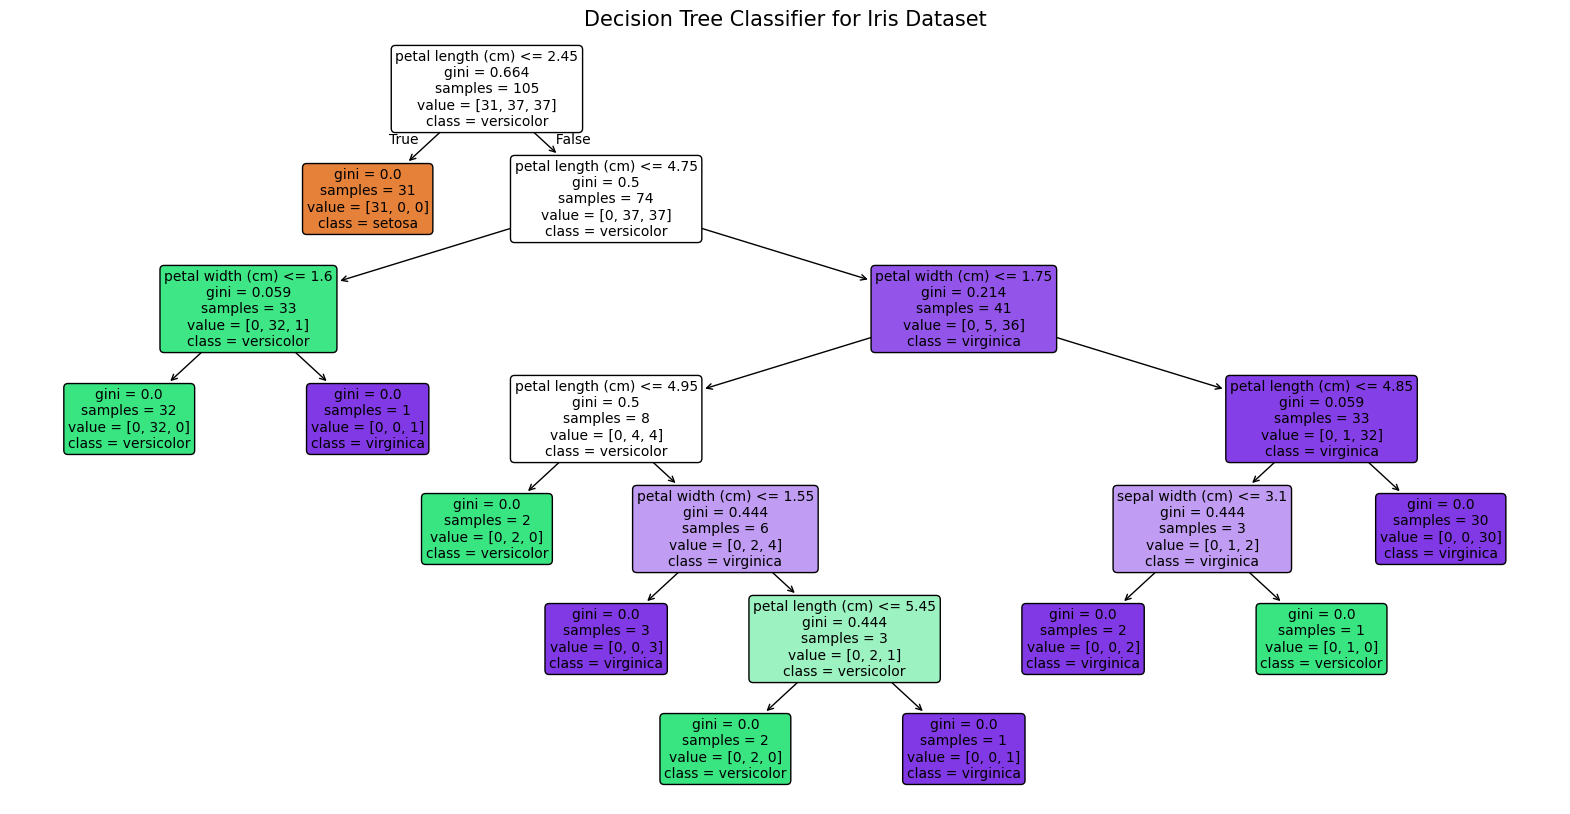

Decision Tree Classifier trained and visualized successfully.


In [38]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a Decision Tree classifier
dtree_classifier = DecisionTreeClassifier(random_state=42)
dtree_classifier.fit(X_train, y_train)

# 4. Plot the learned decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dtree_classifier,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Classifier for Iris Dataset", fontsize=15)
plt.show()

print("Decision Tree Classifier trained and visualized successfully.")


# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



a) A Support Vector Machine (SVM) is a supervised learning algorithm because it is trained on labeled data. It learns an optimal decision boundary (hyperplane) that best separates different classes (for classification) or fits the data (for regression) by maximizing the margin between data points and their corresponding labels.

b) In Support Vector Machines (SVM), the margin is the distance between the decision boundary (hyperplane) and the nearest data points from each class, called support vectors. SVM aims to maximize the margin because a larger margin makes the model more robust to noise and improves generalization, meaning it performs better on unseen data.

c) Support vectors are the training data points that lie closest to the decision boundary (hyperplane) in an SVM. They are important because they directly determine the position and orientation of the decision boundary—moving or removing them changes the boundary, while other points farther away have little to no effect.

d) The kernel function in SVM allows the algorithm to transform data into a higher-dimensional space so that it becomes linearly separable when it is not separable in the original space. This enables SVM to handle complex, non-linear decision boundaries.

Two commonly used kernel functions are:

Linear kernel

Radial Basis Function (RBF) kernel

### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

a) In a linearly separable dataset, SVM chooses the hyperplane that maximizes the margin, i.e., the distance between the hyperplane and the nearest data points from each class (support vectors).

b) When the data is not linearly separable, SVM uses a soft margin approach and/or kernel functions. The soft margin allows some misclassifications, while kernels map the data into a higher-dimensional space where it can be separated linearly.

c) The regularization parameter C controls the trade-off between maximizing the margin and minimizing classification errors.

Very large C: The model tries to classify all training points correctly, leading to a small margin and possible overfitting.

Very small C: The model allows more misclassifications, resulting in a larger margin and better generalization but higher training error.